# Installing Modules

In [ ]:
%%capture
!pip install liac-arff


# Modules

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from scipy.io import arff
from scipy import stats
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
pd.options.mode.chained_assignment = None  # default='warn'
import joblib as joblib
import pickle

# Reading DataSet

In [ ]:
workingPerson=1 ## change it to 1 for islam

In [ ]:
path_train="/content/drive/MyDrive/KDDTrain.arff" if workingPerson==1 else "/content/drive/MyDrive/AttackDetectionModelDataset/data/KDDTrain.arff"
path_test="/content/drive/MyDrive/KDDTest.arff"   if workingPerson==1 else  "/content/drive/MyDrive/AttackDetectionModelDataset/data/KDDTest.arff"

In [ ]:
dataTrain, meta = arff.loadarff(path_train)
dataTest, meta = arff.loadarff(path_test)
# Convert the data into a Pandas DataFrame
trdf = pd.DataFrame(dataTrain)
tedf = pd.DataFrame(dataTest)
# Decode byte-encoded values using applymap and lambda function
trdf = trdf.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
tedf = tedf.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

In [ ]:
totaldf=pd.concat([trdf,tedf])

In [ ]:


totaldf

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.0,tcp,smtp,SF,794.0,333.0,0,0.0,0.0,0.0,...,141.0,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal
22540,0.0,tcp,http,SF,317.0,938.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal
22541,0.0,tcp,http,SF,54540.0,8314.0,0,0.0,0.0,2.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,anomaly
22542,0.0,udp,domain_u,SF,42.0,42.0,0,0.0,0.0,0.0,...,252.0,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal


# Handle Missing Values

In [ ]:
totaldf.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

# Handling duplicates

In [ ]:
totaldf.duplicated().sum()

629

In [ ]:
totaldf.duplicated().sum()

629

In [ ]:
totaldf = totaldf.drop_duplicates()

In [ ]:
totaldf.duplicated().sum()

0

# Handling Inconsistent Data

In [ ]:
for col in totaldf.columns:
  print(totaldf[col].value_counts())
  print("--------")

0.0        134344
1.0          2576
2.0           946
4.0           890
3.0           677
            ...  
10331.0         1
37343.0         1
645.0           1
8635.0          1
8209.0          1
Name: duration, Length: 3424, dtype: int64
--------
tcp     121351
udp      17541
icmp      8996
Name: protocol_type, dtype: int64
--------
http         48168
private      26474
domain_u      9881
smtp          8247
ftp_data      7711
             ...  
tftp_u           4
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64
--------
SF        89385
S0        36808
REJ       14960
RSTR       3082
RSTO       2329
S1          386
SH          344
S3          298
S2          142
RSTOS0      105
OTH          49
Name: flag, dtype: int64
--------
0.0        56823
8.0         3728
1.0         2905
44.0        2618
45.0        2303
           ...  
3283.0         1
47612.0        1
2326.0         1
2542.0         1
5603.0         1
Name: s

In [ ]:
categoricalCols = [col for col in totaldf.columns if totaldf[col].nunique() <= 11 and totaldf[col].nunique() > 1]
removeCols = [col for col in totaldf.columns if totaldf[col].nunique() == 1]
numericalCols=[col for col in totaldf.columns if (col not in categoricalCols) and (col not in removeCols)]


In [ ]:
def returnColumnType(columnName):
    if columnName in categoricalCols:
        return "categorical"
    elif columnName in removeCols:
        return "out"
    elif columnName in numericalCols:
        return "numerical"


In [ ]:
columnsTypesDataFrame=pd.DataFrame({"ColumnName":totaldf.columns})
columnsTypesDataFrame["type"]=columnsTypesDataFrame["ColumnName"].apply(lambda x:returnColumnType(x))
columnsTypesDataFrame["uniqueElements"]=columnsTypesDataFrame["ColumnName"].apply(lambda x:totaldf[x].nunique())

In [ ]:
columnsTypesDataFrame

,ColumnName,type,uniqueElements
0,duration,numerical,3424
1,protocol_type,categorical,3
2,service,numerical,70
3,flag,categorical,11
4,src_bytes,numerical,3601
5,dst_bytes,numerical,10401
6,land,categorical,2
7,wrong_fragment,categorical,3
8,urgent,categorical,4
9,hot,numerical,29


#### let's remove num_outbound_cmds column

In [ ]:
# totaldf.drop('num_outbound_cmds', axis=1, inplace=True)

In [ ]:
totaldf

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22537,1.0,tcp,smtp,SF,2599.0,293.0,0,0.0,0.0,0.0,...,186.0,0.73,0.13,0.00,0.00,0.00,0.00,0.26,0.00,anomaly
22539,0.0,tcp,smtp,SF,794.0,333.0,0,0.0,0.0,0.0,...,141.0,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal
22540,0.0,tcp,http,SF,317.0,938.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal
22541,0.0,tcp,http,SF,54540.0,8314.0,0,0.0,0.0,2.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,anomaly


In [ ]:
serviceMapping={'IRC': 0, 'X11': 1, 'Z39_50': 2, 'aol': 3, 'auth': 4, 'bgp': 5, 'courier': 6, 'csnet_ns': 7, 'ctf': 8, 'daytime': 9, 'discard': 10, 'domain': 11, 'domain_u': 12, 'echo': 13, 'eco_i': 14, 'ecr_i': 15, 'efs': 16, 'exec': 17, 'finger': 18, 'ftp': 19, 'ftp_data': 20, 'gopher': 21, 'harvest': 22, 'hostnames': 23, 'http': 24, 'http_2784': 25, 'http_443': 26, 'http_8001': 27, 'imap4': 28, 'iso_tsap': 29, 'klogin': 30, 'kshell': 31, 'ldap': 32, 'link': 33, 'login': 34, 'mtp': 35, 'name': 36, 'netbios_dgm': 37, 'netbios_ns': 38, 'netbios_ssn': 39, 'netstat': 40, 'nnsp': 41, 'nntp': 42, 'ntp_u': 43, 'other': 44, 'pm_dump': 45, 'pop_2': 46, 'pop_3': 47, 'printer': 48, 'private': 49, 'red_i': 50, 'remote_job': 51, 'rje': 52, 'shell': 53, 'smtp': 54, 'sql_net': 55, 'ssh': 56, 'sunrpc': 57, 'supdup': 58, 'systat': 59, 'telnet': 60, 'tftp_u': 61, 'tim_i': 62, 'time': 63, 'urh_i': 64, 'urp_i': 65, 'uucp': 66, 'uucp_path': 67, 'vmnet': 68, 'whois': 69}
protocol_typeMapping={'icmp': 0, 'tcp': 1, 'udp': 2}
flagMapping={'OTH': 0, 'REJ': 1, 'RSTO': 2, 'RSTOS0': 3, 'RSTR': 4, 'S0': 5, 'S1': 6, 'S2': 7, 'S3': 8, 'SF': 9, 'SH': 10}
totaldf["service"] = totaldf["service"].apply(lambda x:serviceMapping[x])
totaldf["protocol_type"] = totaldf["protocol_type"].apply(lambda x:protocol_typeMapping[x])
totaldf["flag"] = totaldf["flag"].apply(lambda x:flagMapping[x])


In [ ]:
totaldf

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,1,20,9,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,2,44,9,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,1,49,5,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,1,24,9,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,1,24,9,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22537,1.0,1,54,9,2599.0,293.0,0,0.0,0.0,0.0,...,186.0,0.73,0.13,0.00,0.00,0.00,0.00,0.26,0.00,anomaly
22539,0.0,1,54,9,794.0,333.0,0,0.0,0.0,0.0,...,141.0,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal
22540,0.0,1,24,9,317.0,938.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal
22541,0.0,1,24,9,54540.0,8314.0,0,0.0,0.0,2.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,anomaly


In [ ]:
maping={"normal":1,"anomaly":0}
totaldf["class"] = totaldf["class"].apply(lambda x:maping[x])

# Handling Outliers

### Numerical Data

In [ ]:
numericalCols

['duration',
 'service',
 'src_bytes',
 'dst_bytes',
 'hot',
 'num_compromised',
 'num_root',
 'num_file_creations',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [ ]:
totaldf[numericalCols]

,duration,service,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,count,srv_count,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,20,491.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,44,146.0,0.0,0.0,0.0,0.0,0.0,13.0,1.0,...,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.0,49,0.0,0.0,0.0,0.0,0.0,0.0,123.0,6.0,...,255.0,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0.0,24,232.0,8153.0,0.0,0.0,0.0,0.0,5.0,5.0,...,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0.0,24,199.0,420.0,0.0,0.0,0.0,0.0,30.0,32.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22537,1.0,54,2599.0,293.0,0.0,0.0,0.0,0.0,2.0,2.0,...,255.0,186.0,0.73,0.13,0.00,0.00,0.00,0.00,0.26,0.00
22539,0.0,54,794.0,333.0,0.0,0.0,0.0,0.0,1.0,1.0,...,100.0,141.0,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00
22540,0.0,24,317.0,938.0,0.0,0.0,0.0,0.0,2.0,11.0,...,197.0,255.0,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00
22541,0.0,24,54540.0,8314.0,2.0,1.0,0.0,0.0,5.0,10.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07


In [ ]:
for col in numericalCols:
  totaldf = totaldf[~totaldf[col].isin(totaldf[zscore(totaldf[col]) > 3])]


In [ ]:
totaldf

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,1,20,9,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0.0,2,44,9,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0.0,1,49,5,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0.0,1,24,9,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0.0,1,24,9,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22537,1.0,1,54,9,2599.0,293.0,0,0.0,0.0,0.0,...,186.0,0.73,0.13,0.00,0.00,0.00,0.00,0.26,0.00,0
22539,0.0,1,54,9,794.0,333.0,0,0.0,0.0,0.0,...,141.0,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,1
22540,0.0,1,24,9,317.0,938.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,1
22541,0.0,1,24,9,54540.0,8314.0,0,0.0,0.0,2.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,0


# Featuers Selection

### Categorical

In [ ]:
# Create a contingency table from the DataFrame
selectedCategoricalFeatuers=[]
significance_level = 0.05
categoricalColsValuesPValue=[]
categoricalColsResult=[]
for col in categoricalCols:
  print(f"Test Chi-Squared between {col} and target class ")
  contingency_table = pd.crosstab(totaldf[col], totaldf["class"])
  # Run the chi-squared test
  chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
  # Check if the p-value is less than the chosen significance level (e.g., 0.05)
  if col!="class":
      categoricalColsValuesPValue.append(p_val)
  if p_val < significance_level and col!="class":
      print(f"There are reation between the {col} coloum and target class coloum")
      selectedCategoricalFeatuers.append(col)
      categoricalColsResult.append("Accepted")
  elif col!="class":
      print(f"No relation between the {col} coloum and target class coloum ")
      categoricalColsResult.append("Not-Accepted")

  print("P-value:", p_val)
  print("-----")

Test Chi-Squared between protocol_type and target class 
There are reation between the protocol_type coloum and target class coloum
P-value: 0.0
-----
Test Chi-Squared between flag and target class 
There are reation between the flag coloum and target class coloum
P-value: 0.0
-----
Test Chi-Squared between land and target class 
There are reation between the land coloum and target class coloum
P-value: 0.004764653598872073
-----
Test Chi-Squared between wrong_fragment and target class 
There are reation between the wrong_fragment coloum and target class coloum
P-value: 8.17774888730494e-233
-----
Test Chi-Squared between urgent and target class 
No relation between the urgent coloum and target class coloum 
P-value: 0.3212716139589345
-----
Test Chi-Squared between num_failed_logins and target class 
There are reation between the num_failed_logins coloum and target class coloum
P-value: 3.0903218167126444e-92
-----
Test Chi-Squared between logged_in and target class 
There are reation

In [ ]:
categoricalColsTest= pd.DataFrame({"Feature":categoricalCols[:-1],"Pvalue(Chi-Squared)":categoricalColsValuesPValue,"Result":categoricalColsResult})
categoricalColsTest

,Feature,Pvalue(Chi-Squared),Result
0,protocol_type,0.000000e+00,Accepted
1,flag,0.000000e+00,Accepted
2,land,4.764654e-03,Accepted
3,wrong_fragment,8.177749e-233,Accepted
4,urgent,3.212716e-01,Not-Accepted
5,num_failed_logins,3.090322e-92,Accepted
6,logged_in,0.000000e+00,Accepted
7,root_shell,3.864445e-07,Accepted
8,su_attempted,5.028965e-16,Accepted
9,num_shells,6.544044e-02,Not-Accepted


### Numerical

In [ ]:
selectedNumericalFeatuers=[]
significance_level=0.05
numericalColsValuesPValueTTest=[]
numericalColsValuesPValueAnova=[]
numericalColsResult=[]
for col in numericalCols:
  print(f"T-tests and ANOVA tests between {col} and Target")
  group1 = totaldf[totaldf['class'] == 0][col]
  group2 = totaldf[totaldf['class'] == 1][col]
  t_stat, p_value1 = stats.ttest_ind(group1,group2)
  print("T-test results:")
  print("T-statistic:", t_stat)
  print("P-value:", p_value1)
  numericalColsValuesPValueTTest.append(p_value1)
  if  p_value1 < significance_level:
    print(f"The two coloumns {col} and  Target class are correlated ")

  else:
    print(f"The two coloumns {col} and  Target class are not correlated ")


  # Perform one-way ANOVA
  f_stat, p_value2 = f_oneway(group1, group2)
  print("ANOVA results:")
  print("F-statistic:", f_stat)
  print("P-value:", p_value2)
  numericalColsValuesPValueAnova.append(p_value2)
  if  p_value2 < significance_level:
    print(f"The two coloumns {col} and  Target class are correlated ")
  else:
    print(f"The two coloumns {col} and  Target class are not correlated ")

  if p_value1 < significance_level and p_value2 < significance_level:
    selectedNumericalFeatuers.append(col)
    numericalColsResult.append("Accepted")
  else:
    numericalColsResult.append("Not-Accepted")

  print("-----")

T-tests and ANOVA tests between duration and Target
T-test results:
T-statistic: 20.25688457748448
P-value: 4.1097081297446636e-91
The two coloumns duration and  Target class are correlated 
ANOVA results:
F-statistic: 410.3413727855285
P-value: 4.109708130166673e-91
The two coloumns duration and  Target class are correlated 
-----
T-tests and ANOVA tests between service and Target
T-test results:
T-statistic: 121.93511447895489
P-value: 0.0
The two coloumns service and  Target class are correlated 
ANOVA results:
F-statistic: 14868.172142995834
P-value: 0.0
The two coloumns service and  Target class are correlated 
-----
T-tests and ANOVA tests between src_bytes and Target
T-test results:
T-statistic: 2.1122087233040028
P-value: 0.034670222545083895
The two coloumns src_bytes and  Target class are correlated 
ANOVA results:
F-statistic: 4.4614256908015255
P-value: 0.03467022254861154
The two coloumns src_bytes and  Target class are correlated 
-----
T-tests and ANOVA tests between dst

In [ ]:
numericalFeatuersTest= pd.DataFrame({"Feature":numericalCols,"Pvalue(Anova)":numericalColsValuesPValueAnova,"Pvalue(T-Test)":numericalColsValuesPValueTTest,"Result":numericalColsResult})
numericalFeatuersTest

,Feature,Pvalue(Anova),Pvalue(T-Test),Result
0,duration,4.109708e-91,4.109708e-91,Accepted
1,service,0.000000e+00,0.000000e+00,Accepted
2,src_bytes,3.467022e-02,3.467022e-02,Accepted
3,dst_bytes,1.655206e-01,1.655206e-01,Not-Accepted
4,hot,2.754820e-04,2.754820e-04,Accepted
5,num_compromised,1.427113e-04,1.427113e-04,Accepted
6,num_root,1.801394e-05,1.801394e-05,Accepted
7,num_file_creations,1.488664e-11,1.488664e-11,Accepted
8,count,0.000000e+00,0.000000e+00,Accepted
9,srv_count,2.979692e-12,2.979692e-12,Accepted


# SelectDataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(totaldf[totaldf.columns[:-1]], totaldf["class"], test_size=0.2,random_state=42)
train_df = pd.concat([X_train, y_train], axis=1)
train_df.to_csv("trainData.csv",index=False)
test_df = pd.concat([X_test, y_test], axis=1)
test_df.to_csv("testData.csv",index=False)

In [ ]:
train_df.drop('num_outbound_cmds', axis=1, inplace=True)
test_df.drop('num_outbound_cmds', axis=1, inplace=True)

In [ ]:
selecteddatasetTrain=train_df[selectedCategoricalFeatuers+selectedNumericalFeatuers+["class"]]
selecteddatasetTest=test_df[selectedCategoricalFeatuers+selectedNumericalFeatuers+["class"]]

# Standarliztion

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()
selecteddatasetTrain[selecteddatasetTrain.columns[:-1]] = scaler.fit_transform(selecteddatasetTrain[selecteddatasetTrain.columns[:-1]])
selecteddatasetTest[selecteddatasetTest.columns[:-1]] = scaler.transform(selecteddatasetTest[selecteddatasetTest.columns[:-1]])

In [ ]:
joblib.dump(scaler, 'std_scaler.bin', compress=True)

['std_scaler.bin']

# Train and Test Split

In [ ]:
selecteddatasetTrain["class"].value_counts()

1    61695
0    56615
Name: class, dtype: int64

In [ ]:
X_train=selecteddatasetTrain[selecteddatasetTrain.columns[:-1]]
y_train=selecteddatasetTrain["class"]
X_test=selecteddatasetTest[selecteddatasetTest.columns[:-1]]
y_test=selecteddatasetTest["class"]

# Define List for all scores we neeeds

In [ ]:
Recall_Train=[]
Precsison_Train=[]
F1Score_Train=[]
Auc_Train=[]
Recall_Test=[]
Precsison_Test=[]
F1Score_Test=[]
Auc_Test=[]
#for roc curve
FPR=[]
TPR=[]

# Train Xgboost
train model using gridsearch to find best result on train data

In [ ]:
# intializting model
xgb_model = XGBClassifier( objective= 'binary:logistic',
    nthread=4,
    seed=42)

param_grid_XGB = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.5, 1.0]
}
random_search_XGB = RandomizedSearchCV(estimator=xgb_model,param_distributions=param_grid_XGB, cv=5, scoring = 'f1',verbose=10,)
random_search_XGB.fit(X_train, y_train)
print("Best Parameters: ", random_search_XGB.best_params_)
print("Best Accuracy: ", random_search_XGB.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START colsample_bytree=1.0, gamma=0.5, learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.9
[CV 1/5; 1/10] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.9;, score=0.954 total time=   1.9s
[CV 2/5; 1/10] START colsample_bytree=1.0, gamma=0.5, learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.9
[CV 2/5; 1/10] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.9;, score=0.949 total time=   1.9s
[CV 3/5; 1/10] START colsample_bytree=1.0, gamma=0.5, learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.9
[CV 3/5; 1/10] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.9;, score=0.950 total time=   1.8s
[CV 4/5; 1/10] START colsample_bytree=1.0, gamma=0.5, learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.9
[CV 4/

# Evaluate Xgboost
evaluate the model on Train and Test data then view confusion matrix for train and test , dont forget to put the scores in the above lists



In [ ]:
#selecting the best model
best_model_XGB = random_search_XGB.best_estimator_
#predictions
y_train_pred = best_model_XGB.predict(X_train)
y_test_pred = best_model_XGB.predict(X_test)
#y_Probs
y_train_probs = best_model_XGB.predict_proba(X_train)[:, 1]
y_test_probs = best_model_XGB.predict_proba(X_test)[:, 1]
# evaluate
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
FPR.append(fpr)
TPR.append(tpr)
# Training set metrics
recall_train = recall_score(y_train, y_train_pred, average='binary')
precision_train = precision_score(y_train, y_train_pred, average='binary')
f1_score_train = f1_score(y_train, y_train_pred, average='binary')
auc_train = roc_auc_score(y_train, y_train_probs)

# Testing set metrics
recall_test = recall_score(y_test, y_test_pred, average='binary')
precision_test = precision_score(y_test, y_test_pred, average='binary')
f1_score_test = f1_score(y_test, y_test_pred, average='binary')
auc_test = roc_auc_score(y_test, y_test_probs)

In [ ]:
#For train
Recall_Train.append(recall_train)
Precsison_Train.append(precision_train)
F1Score_Train.append(f1_score_train)
Auc_Train.append(auc_train)

#for Test
Recall_Test.append(recall_test)
Precsison_Test.append(precision_test)
F1Score_Test.append(f1_score_test)
Auc_Test.append(auc_test)

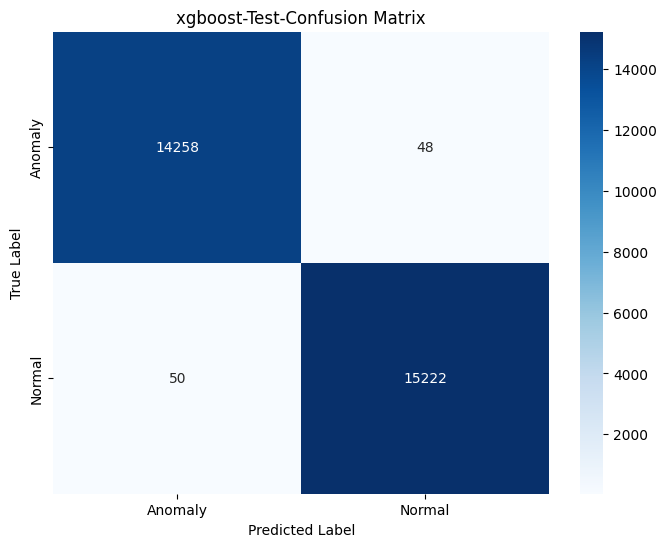

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Anomaly', 'Normal'], yticklabels=['Anomaly', 'Normal'])
plt.title("xgboost-Test-Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14306
           1       1.00      1.00      1.00     15272

    accuracy                           1.00     29578
   macro avg       1.00      1.00      1.00     29578
weighted avg       1.00      1.00      1.00     29578



# Save Model

In [ ]:
best_model_XGB.fit(X_train,y_train)
pickle.dump(best_model_XGB, open("Xgboost_model.pkl", "wb"))

# Train gradient boost
train model using gridsearch to find best result on train data

In [ ]:
gb_model = GradientBoostingClassifier()

param_grid_GB = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

grid_search_GB = RandomizedSearchCV(estimator=gb_model, param_distributions=param_grid_GB, cv=3, scoring='f1',verbose=10)

grid_search_GB.fit(X_train, y_train)

print("Best Parameters: ", grid_search_GB.best_params_)
print("Best Accuracy: ", grid_search_GB.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START learning_rate=0.1, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=50, subsample=0.9
[CV 1/3; 1/10] END learning_rate=0.1, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=50, subsample=0.9;, score=0.987 total time=   7.8s
[CV 2/3; 1/10] START learning_rate=0.1, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=50, subsample=0.9
[CV 2/3; 1/10] END learning_rate=0.1, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=50, subsample=0.9;, score=0.987 total time=   9.2s
[CV 3/3; 1/10] START learning_rate=0.1, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=50, subsample=0.9
[CV 3/3; 1/10] END learning_rate=0.1, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=50, subsample=0.9;, score=0.987 total time=   7.0s
[CV 1/3; 2/10] START learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=10, 

# Evaluate gradientboost
evaluate the model on Train and Test data then view confusion matrix for train and test , dont forget to put the scores in the above lists



In [ ]:
#selecting the best model
best_model_GB = grid_search_GB.best_estimator_

#predictions
y_train_pred = best_model_GB.predict(X_train)
y_test_pred = best_model_GB.predict(X_test)

#y_Probs
y_train_probs = best_model_GB.predict_proba(X_train)[:, 1]
y_test_probs = best_model_GB.predict_proba(X_test)[:, 1]

# evaluate
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
FPR.append(fpr)
TPR.append(tpr)


# Training set metrics
recall_train = recall_score(y_train, y_train_pred, average='binary')
precision_train = precision_score(y_train, y_train_pred, average='binary')
f1_score_train = f1_score(y_train, y_train_pred, average='binary')
auc_train = roc_auc_score(y_train, y_train_probs)

# Testing set metrics
recall_test = recall_score(y_test, y_test_pred, average='binary')
precision_test = precision_score(y_test, y_test_pred, average='binary')
f1_score_test = f1_score(y_test, y_test_pred, average='binary')
auc_test = roc_auc_score(y_test, y_test_probs)


In [ ]:
#For train
Recall_Train.append(recall_train)
Precsison_Train.append(precision_train)
F1Score_Train.append(f1_score_train)
Auc_Train.append(auc_train)

#for Test
Recall_Test.append(recall_test)
Precsison_Test.append(precision_test)
F1Score_Test.append(f1_score_test)
Auc_Test.append(auc_test)

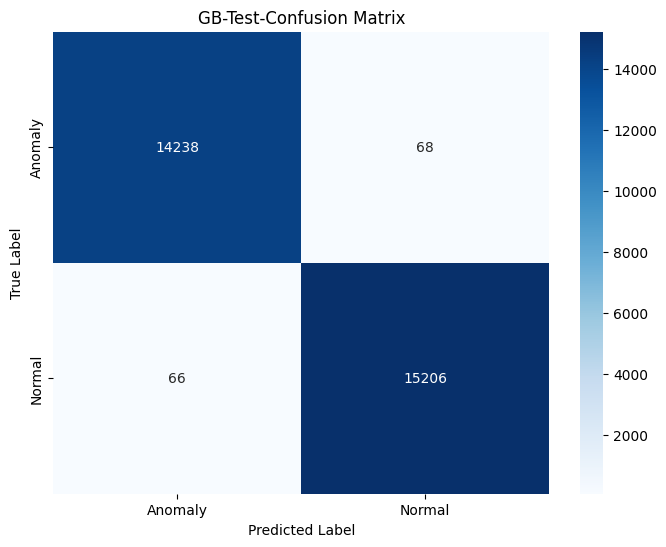

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Anomaly', 'Normal'], yticklabels=['Anomaly', 'Normal'])
plt.title("GB-Test-Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14306
           1       1.00      1.00      1.00     15272

    accuracy                           1.00     29578
   macro avg       1.00      1.00      1.00     29578
weighted avg       1.00      1.00      1.00     29578



# Save Model

In [ ]:
best_model_GB.fit(X_train,y_train)
pickle.dump(best_model_GB, open("gradientboosting_model.pkl", "wb"))

# Train Descision Tree
train model using gridsearch to find best result on train data

In [ ]:
dt_model = DecisionTreeClassifier()
param_grid_DT = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search_DT = RandomizedSearchCV(estimator=dt_model, param_distributions=param_grid_DT, cv=5, scoring='f1')
grid_search_DT.fit(X_train, y_train)

print("Best Parameters: ", grid_search_DT.best_params_)
print("Best Accuracy: ", grid_search_DT.best_score_)

Best Parameters:  {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 15, 'criterion': 'entropy'}
Best Accuracy:  0.9944290881755083


# Evaluate Descision Tree
evaluate the model on Train and Test data then view confusion matrix for train and test , dont forget to put the scores in the above lists



In [ ]:
#selecting the best model
best_model_DT = grid_search_DT.best_estimator_

#predictions
y_train_pred = best_model_DT.predict(X_train)
y_test_pred = best_model_DT.predict(X_test)

#y_Probs
y_train_probs = best_model_DT.predict_proba(X_train)[:, 1]
y_test_probs = best_model_DT.predict_proba(X_test)[:, 1]

# evaluate
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
FPR.append(fpr)
TPR.append(tpr)


# Training set metrics
recall_train = recall_score(y_train, y_train_pred, average='binary')
precision_train = precision_score(y_train, y_train_pred, average='binary')
f1_score_train = f1_score(y_train, y_train_pred, average='binary')
auc_train = roc_auc_score(y_train, y_train_probs)

# Testing set metrics
recall_test = recall_score(y_test, y_test_pred, average='binary')
precision_test = precision_score(y_test, y_test_pred, average='binary')
f1_score_test = f1_score(y_test, y_test_pred, average='binary')
auc_test = roc_auc_score(y_test, y_test_probs)

In [ ]:
#For train
Recall_Train.append(recall_train)
Precsison_Train.append(precision_train)
F1Score_Train.append(f1_score_train)
Auc_Train.append(auc_train)

#for Test
Recall_Test.append(recall_test)
Precsison_Test.append(precision_test)
F1Score_Test.append(f1_score_test)
Auc_Test.append(auc_test)

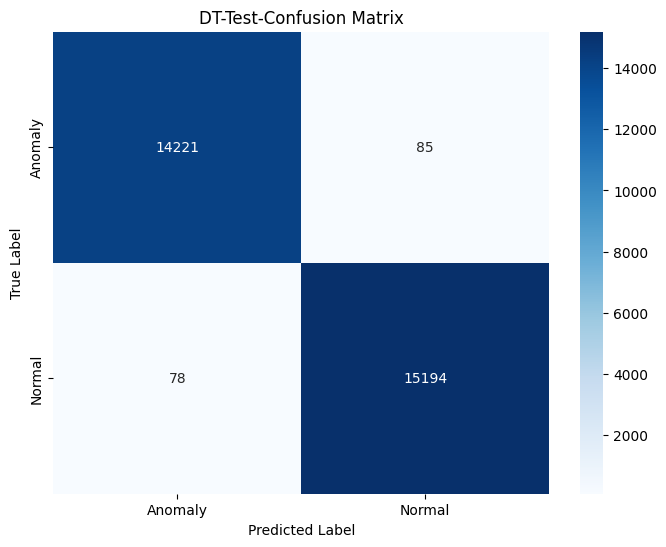

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Anomaly', 'Normal'], yticklabels=['Anomaly', 'Normal'])
plt.title("DT-Test-Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14306
           1       0.99      0.99      0.99     15272

    accuracy                           0.99     29578
   macro avg       0.99      0.99      0.99     29578
weighted avg       0.99      0.99      0.99     29578



# save model

In [ ]:
best_model_DT.fit(X_train,y_train)
pickle.dump(best_model_DT, open("DT_model.pkl", "wb"))

# Train Random Forest
train model using gridsearch to find best result on train data

In [ ]:
rf_classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


grid_search_RF = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, cv=2, scoring='f1')

grid_search_RF.fit(X_train, y_train)

print("Best Parameters: ", grid_search_RF.best_params_)
print("Best Accuracy: ", grid_search_RF.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}
Best Accuracy:  0.9947247062059388


# Evaluate Random Forest
evaluate the model on Train and Test data then view confusion matrix for train and test , dont forget to put the scores in the above lists



In [ ]:
#selecting the best model
best_model_RF = grid_search_RF.best_estimator_

#predictions
y_train_pred = best_model_RF.predict(X_train)
y_test_pred = best_model_RF.predict(X_test)

#y_Probs
y_train_probs = best_model_RF.predict_proba(X_train)[:, 1]
y_test_probs = best_model_RF.predict_proba(X_test)[:, 1]

# evaluate
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
FPR.append(fpr)
TPR.append(tpr)


# Training set metrics
recall_train = recall_score(y_train, y_train_pred, average='binary')
precision_train = precision_score(y_train, y_train_pred, average='binary')
f1_score_train = f1_score(y_train, y_train_pred, average='binary')
auc_train = roc_auc_score(y_train, y_train_probs)

# Testing set metrics
recall_test = recall_score(y_test, y_test_pred, average='binary')
precision_test = precision_score(y_test, y_test_pred, average='binary')
f1_score_test = f1_score(y_test, y_test_pred, average='binary')
auc_test = roc_auc_score(y_test, y_test_probs)

In [ ]:
#For train
Recall_Train.append(recall_train)
Precsison_Train.append(precision_train)
F1Score_Train.append(f1_score_train)
Auc_Train.append(auc_train)

#for Test
Recall_Test.append(recall_test)
Precsison_Test.append(precision_test)
F1Score_Test.append(f1_score_test)
Auc_Test.append(auc_test)

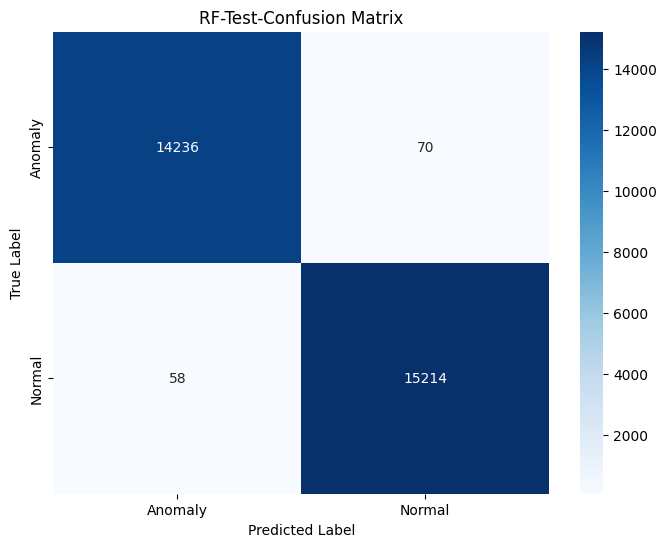

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Anomaly', 'Normal'], yticklabels=['Anomaly', 'Normal'])
plt.title("RF-Test-Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
best_model_RF.fit(X_train,y_train)
print(classification_report(y_test, y_test_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14306
           1       1.00      1.00      1.00     15272

    accuracy                           1.00     29578
   macro avg       1.00      1.00      1.00     29578
weighted avg       1.00      1.00      1.00     29578



# Save Model

In [ ]:
pickle.dump(best_model_RF, open("Rf_model.pkl", "wb"))

# Train logestic regression
train model using gridsearch to find best result on train data

In [ ]:
logreg_model = LogisticRegression()

param_grid_LR = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search_LR = RandomizedSearchCV(estimator=logreg_model, param_distributions=param_grid_LR, cv=2, scoring='f1')

grid_search_LR.fit(X_train, y_train)

print("Best Parameters: ", grid_search_LR.best_params_)
print("Best Accuracy: ", grid_search_LR.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Parameters:  {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
Best Accuracy:  0.939306552705991


# Evaluate logestic regression
evaluate the model on Train and Test data then view confusion matrix for train and test , dont forget to put the scores in the above lists



In [ ]:
#selecting the best model
best_model_LR = grid_search_LR.best_estimator_

#predictions
y_train_pred = best_model_LR.predict(X_train)
y_test_pred = best_model_LR.predict(X_test)

#y_Probs
y_train_probs = best_model_LR.predict_proba(X_train)[:, 1]
y_test_probs = best_model_LR.predict_proba(X_test)[:, 1]

# evaluate
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
FPR.append(fpr)
TPR.append(tpr)


# Training set metrics
recall_train = recall_score(y_train, y_train_pred, average='binary')
precision_train = precision_score(y_train, y_train_pred, average='binary')
f1_score_train = f1_score(y_train, y_train_pred, average='binary')
auc_train = roc_auc_score(y_train, y_train_probs)

# Testing set metrics
recall_test = recall_score(y_test, y_test_pred, average='binary')
precision_test = precision_score(y_test, y_test_pred, average='binary')
f1_score_test = f1_score(y_test, y_test_pred, average='binary')
auc_test = roc_auc_score(y_test, y_test_probs)

In [ ]:
#For train
Recall_Train.append(recall_train)
Precsison_Train.append(precision_train)
F1Score_Train.append(f1_score_train)
Auc_Train.append(auc_train)

#for Test
Recall_Test.append(recall_test)
Precsison_Test.append(precision_test)
F1Score_Test.append(f1_score_test)
Auc_Test.append(auc_test)

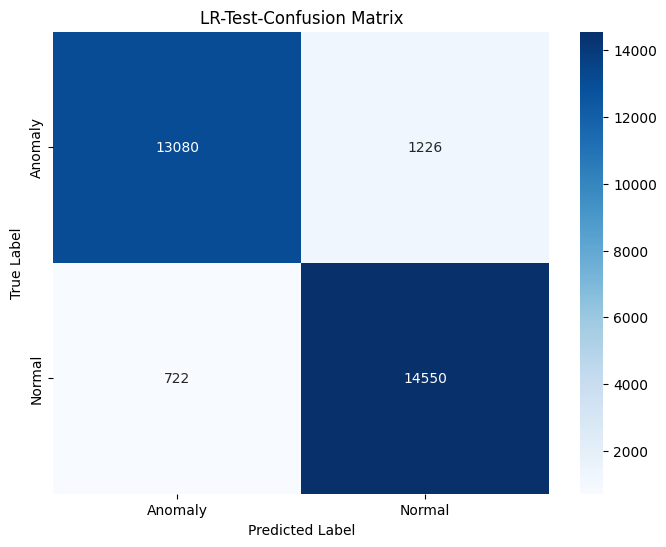

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Anomaly', 'Normal'], yticklabels=['Anomaly', 'Normal'])
plt.title("LR-Test-Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     14306
           1       0.92      0.95      0.94     15272

    accuracy                           0.93     29578
   macro avg       0.93      0.93      0.93     29578
weighted avg       0.93      0.93      0.93     29578



# Save Model

In [ ]:
best_model_LR.fit(X_train,y_train)
pickle.dump(best_model_LR, open("LR_model.pkl", "wb"))

# Train Neural Network
train model using gridsearch to find best result on train data

In [ ]:
# Define a custom F1 score metric
def f1_metric(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float'), axis=0)

    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())

    f1 = 2 * precision * recall / (precision + recall + K.epsilon())
    return K.mean(f1)


## Define Model

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4736      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [ ]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=[f1_metric])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=8, batch_size=32)

Epoch 1/8
3698/3698 [==============================] - 23s 4ms/step - loss: 0.1326 - f1_metric: 0.9512
Epoch 2/8
3698/3698 [==============================] - 16s 4ms/step - loss: 0.0760 - f1_metric: 0.9745
Epoch 3/8
3698/3698 [==============================] - 16s 4ms/step - loss: 0.0670 - f1_metric: 0.9779
Epoch 4/8
3698/3698 [==============================] - 16s 4ms/step - loss: 0.0614 - f1_metric: 0.9797
Epoch 5/8
3698/3698 [==============================] - 16s 4ms/step - loss: 0.0595 - f1_metric: 0.9798
Epoch 6/8
3698/3698 [==============================] - 15s 4ms/step - loss: 0.0563 - f1_metric: 0.9813
Epoch 7/8
3698/3698 [==============================] - 15s 4ms/step - loss: 0.0554 - f1_metric: 0.9818
Epoch 8/8
3698/3698 [==============================] - 16s 4ms/step - loss: 0.0540 - f1_metric: 0.9819


# Evaluate Neural Network
evaluate the model on Train and Test data then view confusion matrix for train and test , dont forget to put the scores in the above lists



In [ ]:
# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred_Test = (y_pred_prob > 0.5).astype(int)

925/925 [==============================] - 2s 2ms/step


In [ ]:
y_pred_prob = model.predict(X_train)
y_pred_Train = (y_pred_prob > 0.5).astype(int)

3698/3698 [==============================] - 6s 2ms/step


In [ ]:

#AUC
auc_test = roc_auc_score(y_test, y_pred_Test)
auc_train = roc_auc_score(y_train, y_pred_Train)

# append
Auc_Train.append(auc_train)
Auc_Test.append(auc_test)

# for roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_Test)
FPR.append(fpr)
TPR.append(tpr)

In [ ]:
# Calculate and print F1 score
f1 = f1_score(y_test, y_pred_Test)
F1Score_Test.append(f1)
print(f"Test F1 Score: {f1}")
# Calculate and print F1 score
f1 = f1_score(y_train, y_pred_Train)
F1Score_Train.append(f1)
print(f"Train F1 Score: {f1}")

Test F1 Score: 0.9847838919131632
Train F1 Score: 0.9858384972260975


### Confusion matrix Test

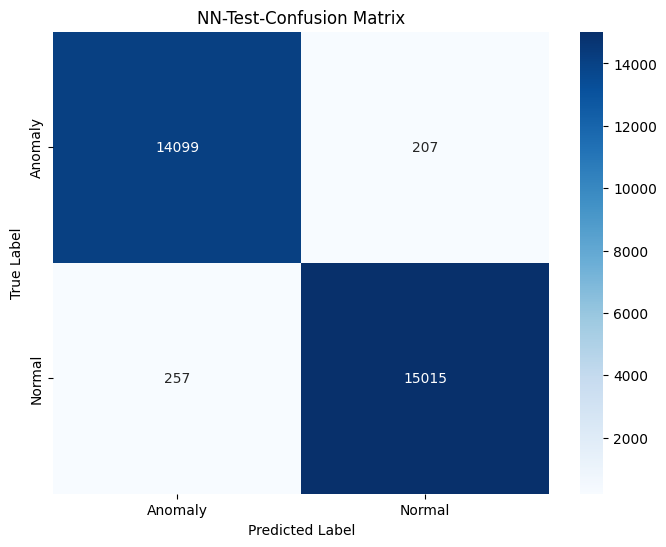

In [ ]:
cm = confusion_matrix(y_test, y_pred_Test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Anomaly', 'Normal'], yticklabels=['Anomaly', 'Normal'])
plt.title("NN-Test-Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### classfication report test

In [ ]:
print(classification_report(y_test, y_pred_Test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     14306
           1       0.99      0.98      0.98     15272

    accuracy                           0.98     29578
   macro avg       0.98      0.98      0.98     29578
weighted avg       0.98      0.98      0.98     29578



### assign recall and precision

In [ ]:
nn_train_recall = recall_score(y_train, y_pred_Train)
nn_train_precision = precision_score(y_train, y_pred_Train)
nn_test_recall = recall_score(y_test, y_pred_Test)
nn_test_precision = precision_score(y_test, y_pred_Test)

In [ ]:
Recall_Train.append(nn_train_recall)
Recall_Test.append(nn_test_recall)
Precsison_Train.append(nn_train_precision)
Precsison_Test.append(nn_test_precision)

# Compare Models Results

In [ ]:
models_=['xgboost','gradient boost','decision tree','random forest','logistic regression','neural network']

df_train_compare = pd.DataFrame({'Models':models_,'Recall':Recall_Train,'Precsision':Precsison_Train,'F1 Score':F1Score_Train,'AUC':Auc_Train})
df_test_compare = pd.DataFrame({'Models':models_,'Recall':Recall_Test,'Precsision':Precsison_Test,'F1 Score':F1Score_Test,'AUC':Auc_Test})

In [ ]:
df_test_compare

,Models,Recall,Precsision,F1 Score,AUC
0,xgboost,0.996726,0.996857,0.996791,0.999950
1,gradient boost,0.995678,0.995548,0.995613,0.999861
2,decision tree,0.994893,0.994437,0.994665,0.996422
3,random forest,0.996202,0.995420,0.995811,0.999912
4,logistic regression,0.952724,0.922287,0.937258,0.979320
5,neural network,0.983172,0.986401,0.984784,0.984351


In [ ]:
df_train_compare

,Models,Recall,Precsision,F1 Score,AUC
0,xgboost,0.999271,0.998542,0.998906,0.999995
1,gradient boost,0.998249,0.995893,0.997070,0.999937
2,decision tree,0.998849,0.996588,0.997717,0.999983
3,random forest,0.998898,0.996910,0.997903,0.999984
4,logistic regression,0.956269,0.922924,0.939301,0.980365
5,neural network,0.985056,0.986623,0.985838,0.985251
